In [561]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

start = '2014-01-01'
end = end

PEP_data = yf.download('PEP', start=start, end=end)
NFLX_data = yf.download('NFLX', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [562]:
def stock_return_func(df):
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['daily_ret_1'] = df['daily_ret'] + 1
    df['monthly_ret'] = df.resample('1M')['daily_ret_1'].transform('prod') - 1
    df['annual_ret'] = df.resample('1A')['daily_ret_1'].transform('prod') - 1
    return df

In [563]:
stock_return_func(PEP_data)
stock_return_func(NFLX_data)

,Open,High,Low,Close,Adj Close,Volume,daily_ret,daily_ret_1,monthly_ret,annual_ret
Date,,,,,,,,,,
2014-01-02,52.401428,52.511429,51.542858,51.831429,51.831429,12325600,NaN,NaN,0.128190,-0.058459
2014-01-03,52.000000,52.495712,51.842857,51.871429,51.871429,10817100,0.000772,1.000772,0.128190,-0.058459
2014-01-06,51.889999,52.044285,50.475716,51.367142,51.367142,15501500,-0.009722,0.990278,0.128190,-0.058459
2014-01-07,49.684284,49.698570,48.152859,48.500000,48.500000,36167600,-0.055817,0.944183,0.128190,-0.058459
2014-01-08,48.104286,49.425713,48.074287,48.712856,48.712856,20001100,0.004389,1.004389,0.128190,-0.058459
...,...,...,...,...,...,...,...,...,...,...
2024-11-01,753.479980,763.799988,747.770020,756.099976,756.099976,2996800,0.000093,1.000093,0.053582,0.636009
2024-11-04,753.140015,762.479980,749.690002,755.510010,755.510010,1902200,-0.000780,0.999220,0.053582,0.636009
2024-11-05,757.349976,767.530029,756.270020,763.909973,763.909973,2200600,0.011118,1.011118,0.053582,0.636009


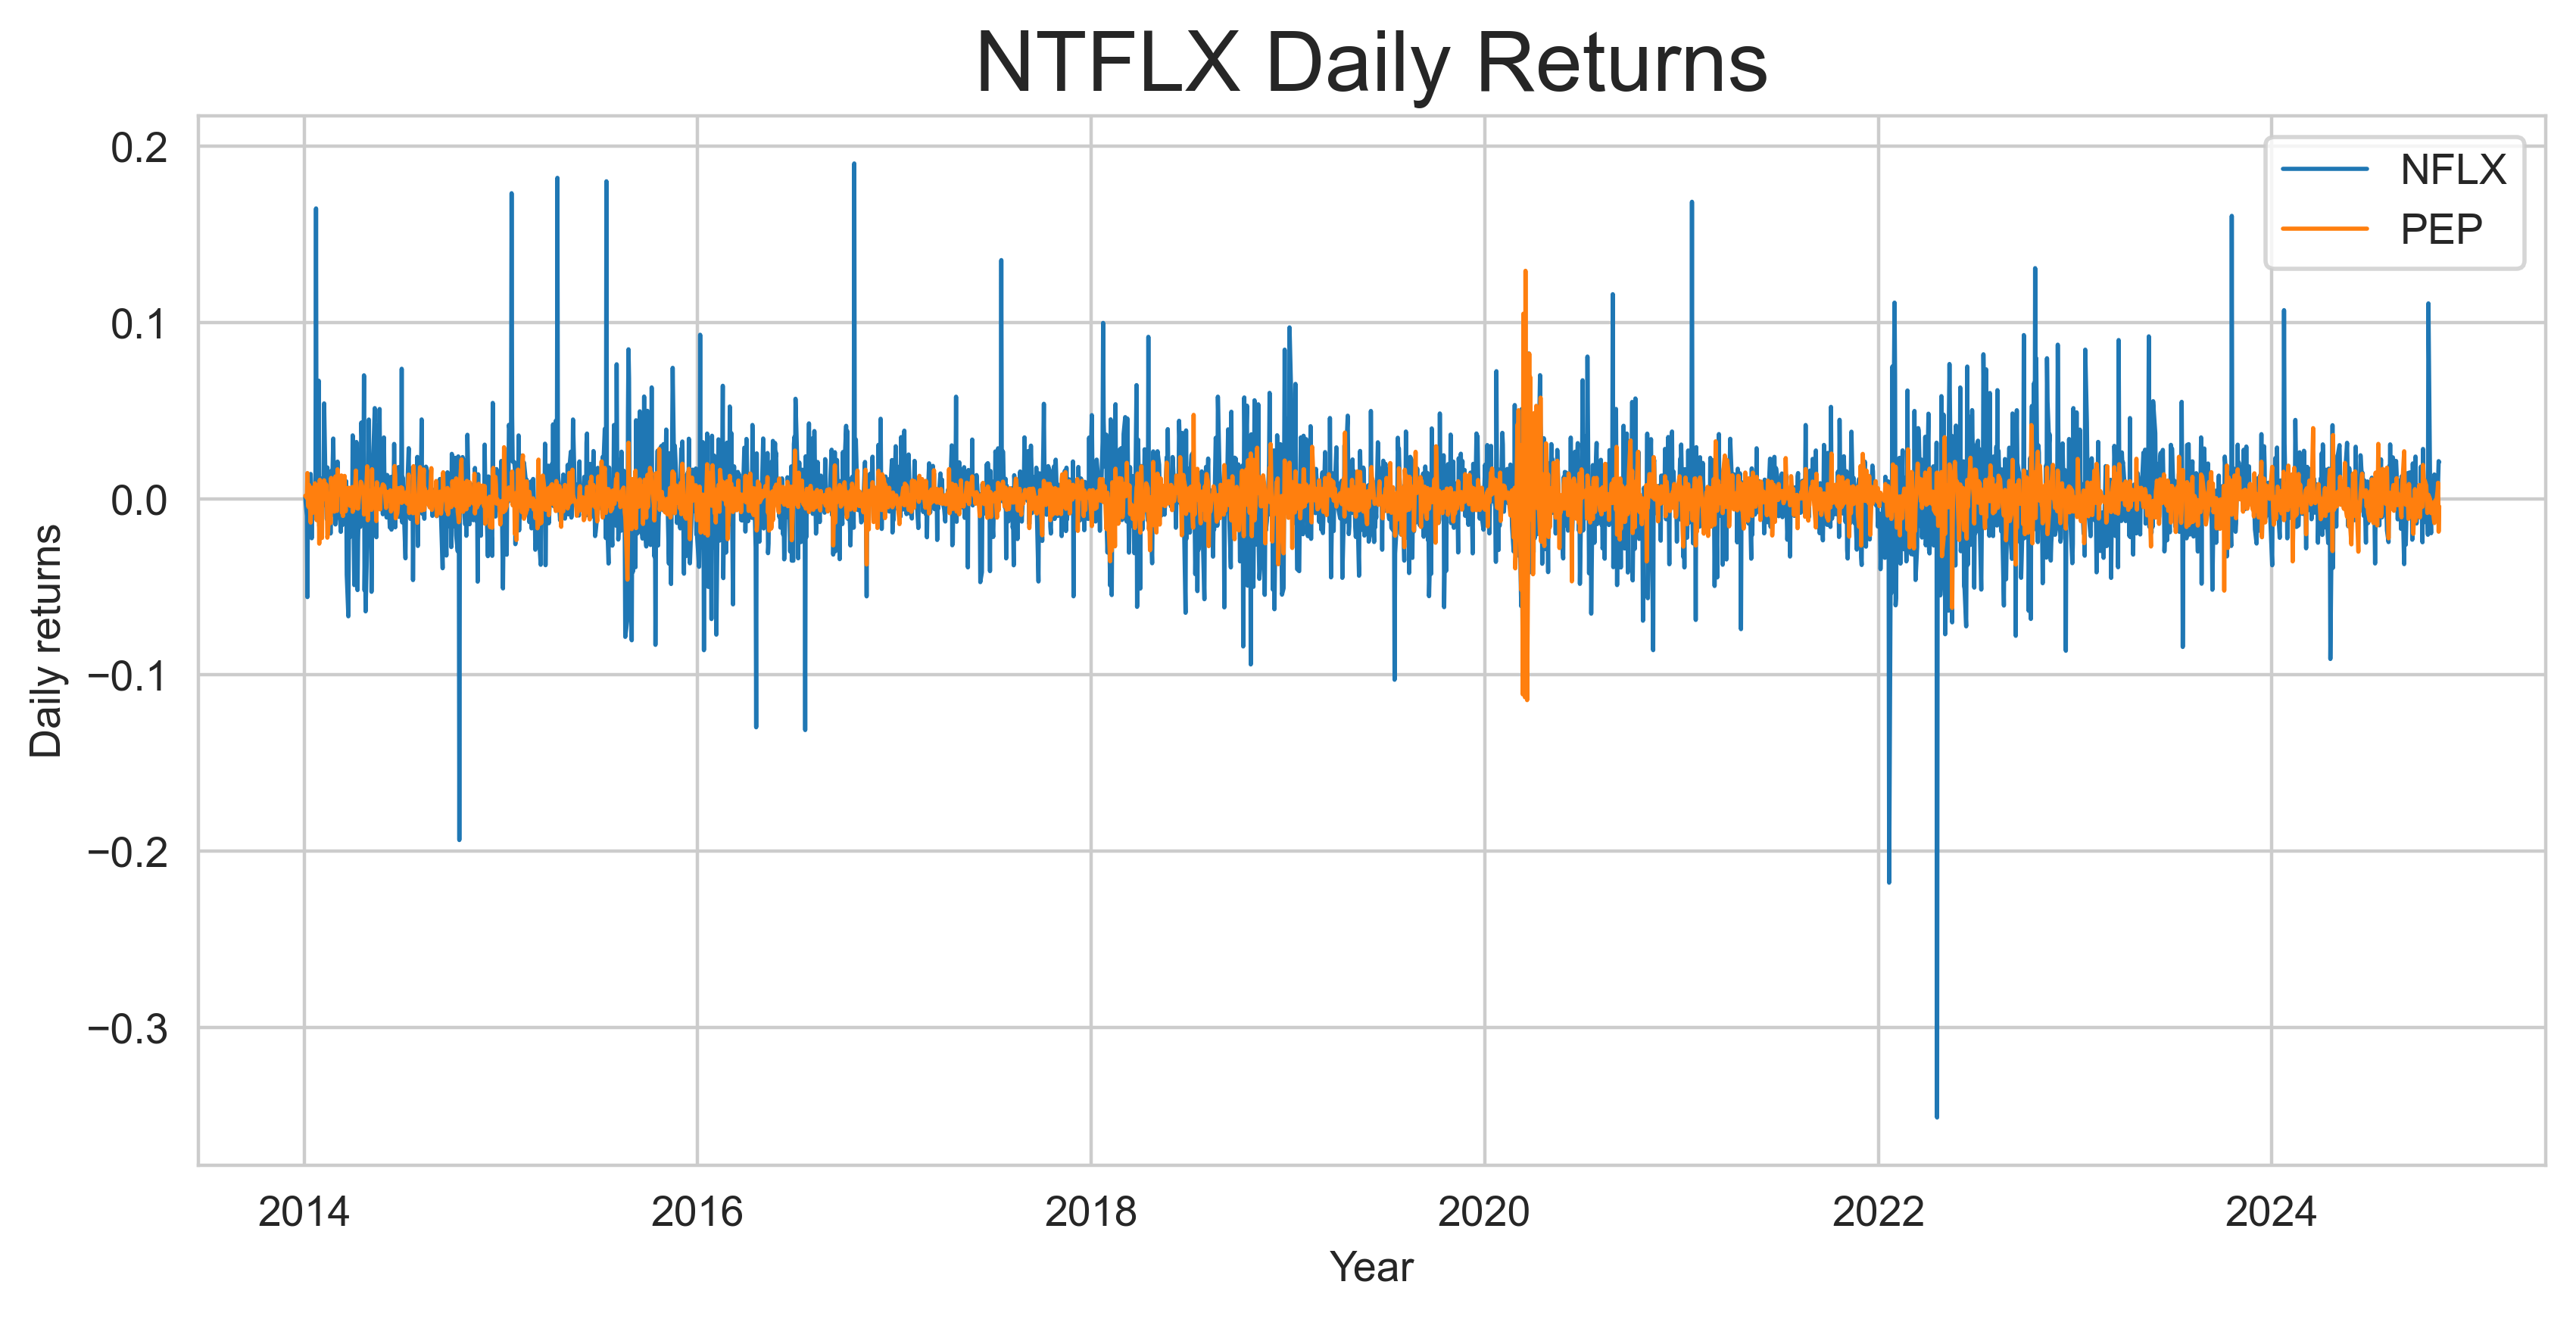

NFLX Return mean: 0.0013849839583747236
PEP Return mean: 0.00043297586483714406


In [593]:
fig, ax = plt.subplots(figsize=(10, 4.5), dpi = 400)

ax.plot(NFLX_data.index, NFLX_data['daily_ret'], label='NFLX', linewidth = 1)
ax.plot(PEP_data.index, PEP_data['daily_ret'], label='PEP', linewidth = 1)


ax.set_title('NTFLX Daily Returns', fontsize=20)
ax.legend()

ax.set_ylabel('Daily returns')
ax.set_xlabel('Year')
ax.grid(True)

plt.show()

print(f"NFLX Return mean: {NFLX_data['daily_ret'].mean()}")
print(f"PEP Return mean: {PEP_data['daily_ret'].mean()}")

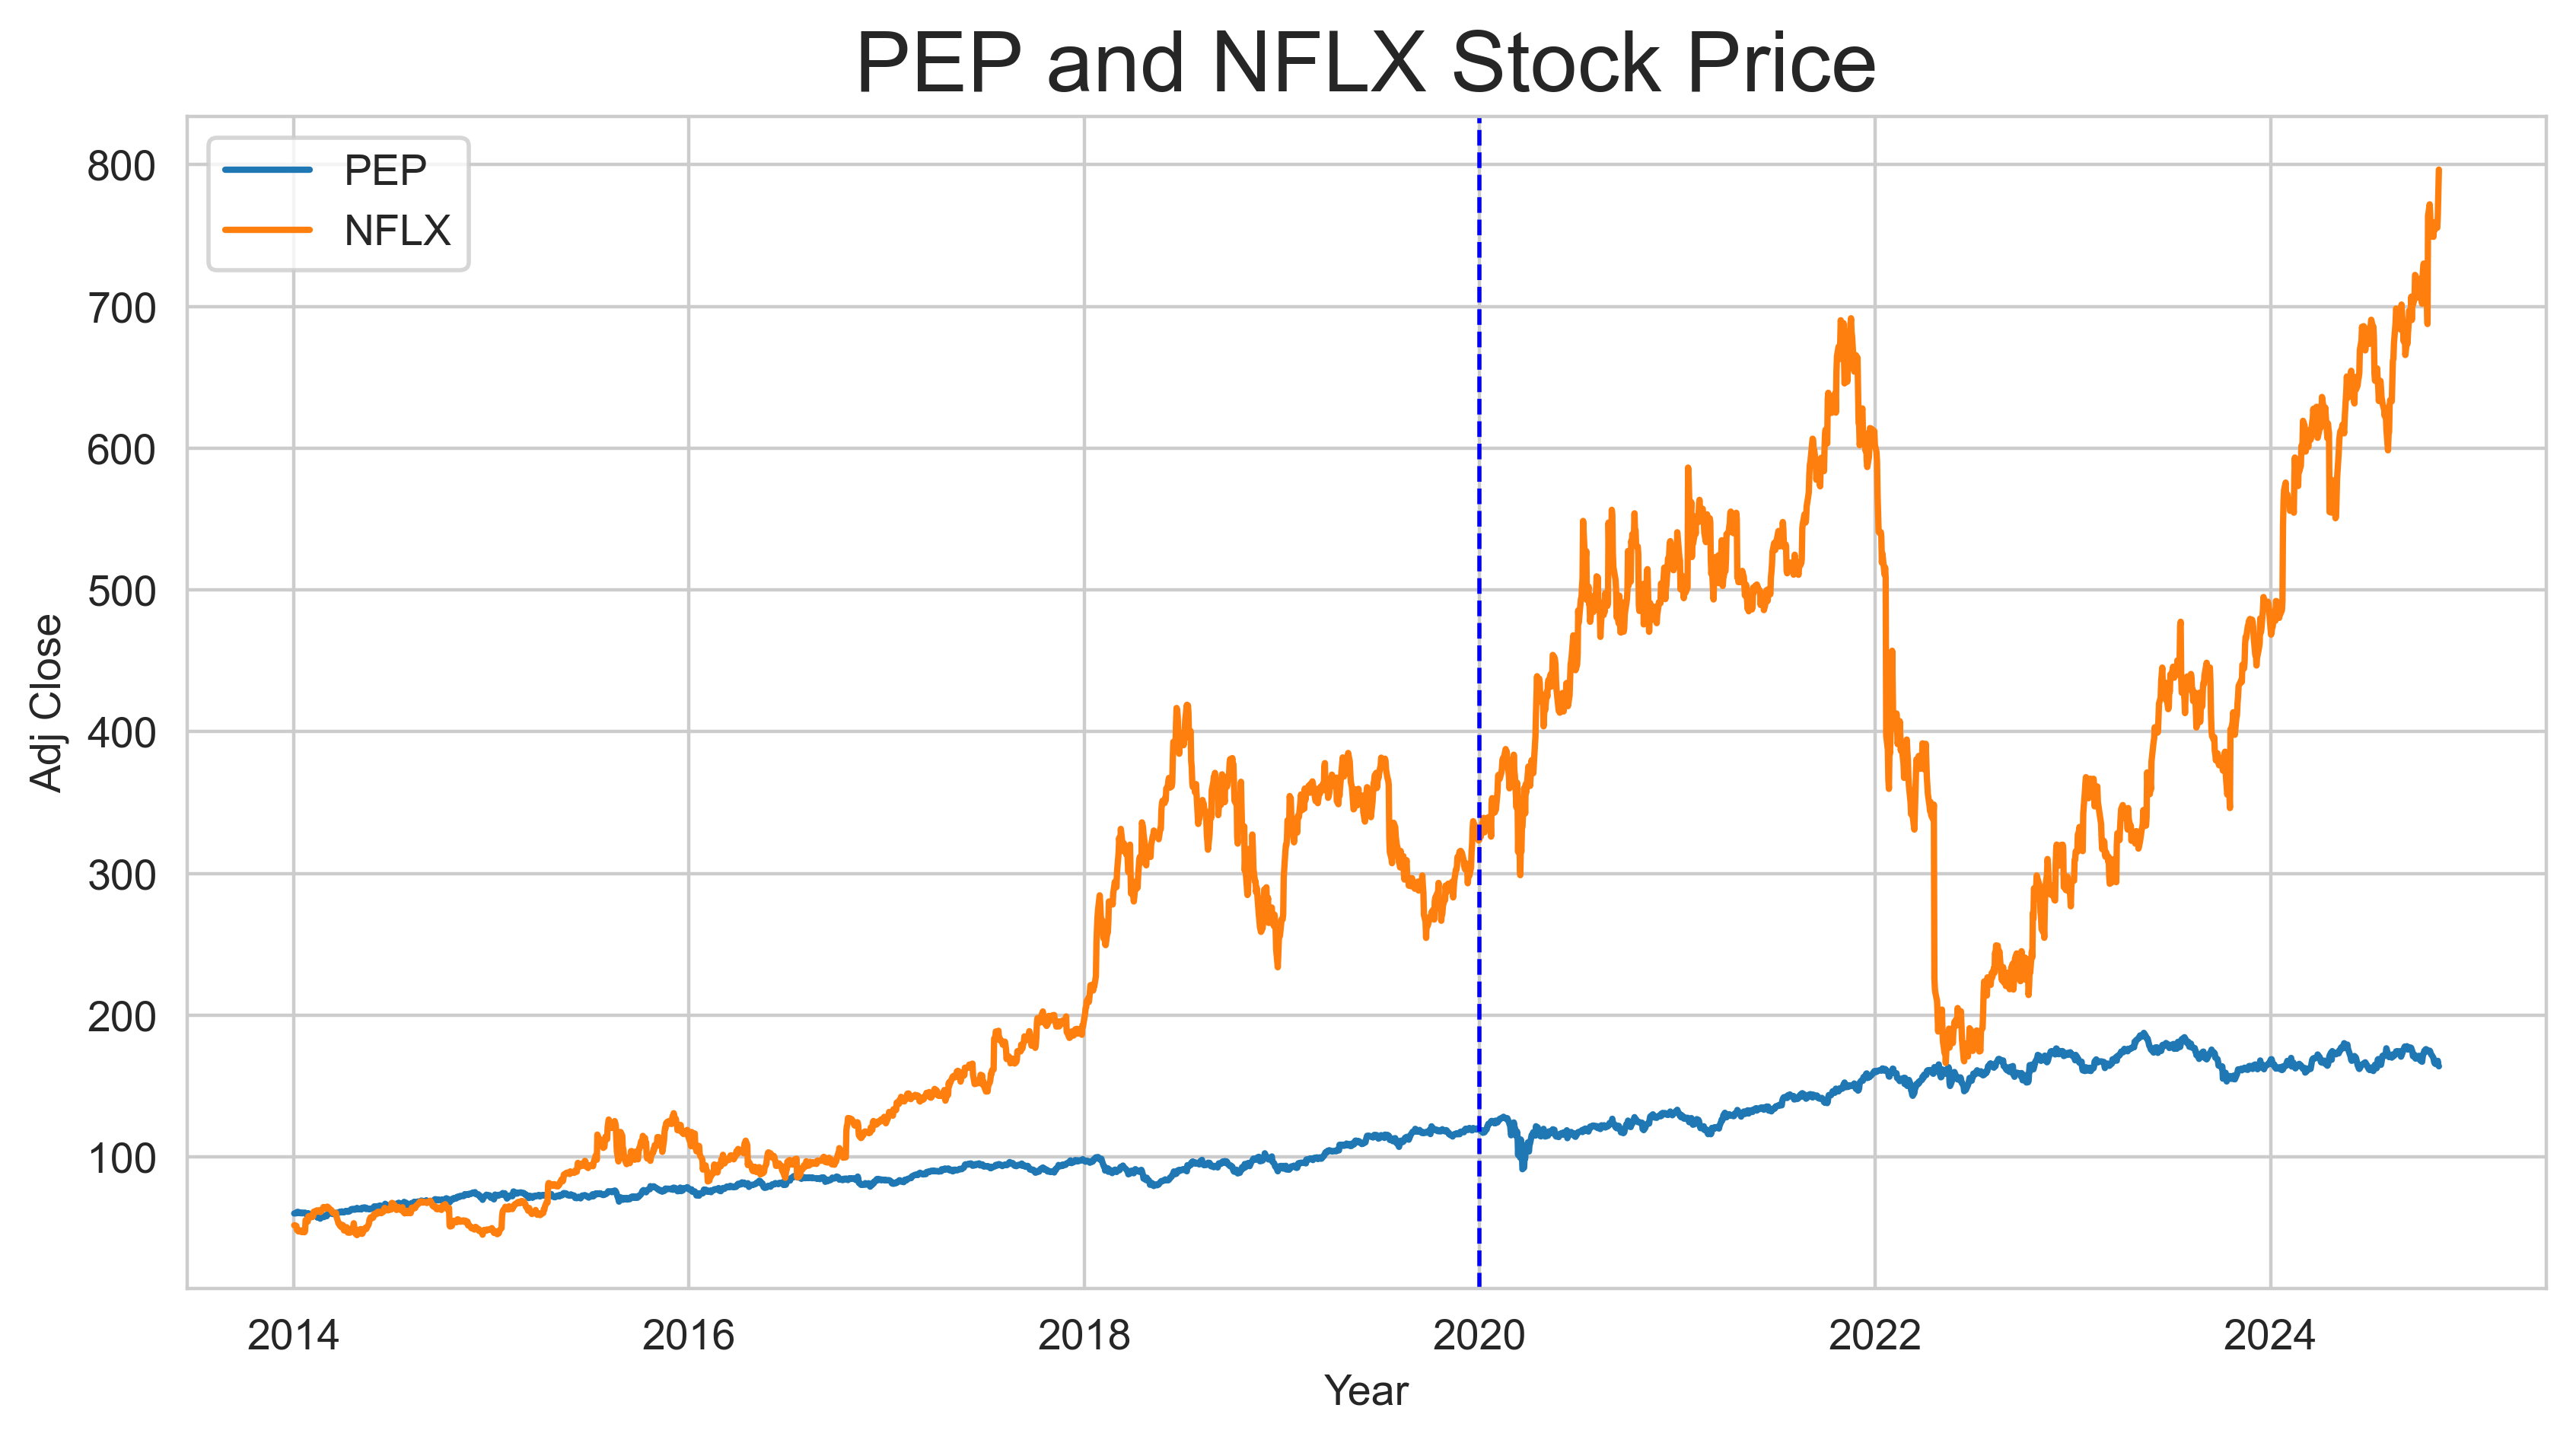

In [589]:
fig, ax = plt.subplots(figsize=(10, 5), dpi = 400)

ax.plot(PEP_data.index, PEP_data['Adj Close'], label='PEP')
ax.plot(NFLX_data.index, NFLX_data['Adj Close'], label='NFLX')
ax.axvline(pd.Timestamp("2020-01-01"), color='b', linestyle='--', linewidth=1)


ax.set_title('PEP and NFLX Stock Price', fontsize=20)
ax.legend()

ax.set_ylabel('Adj Close')
ax.set_xlabel('Year')
ax.grid(True)

plt.show()

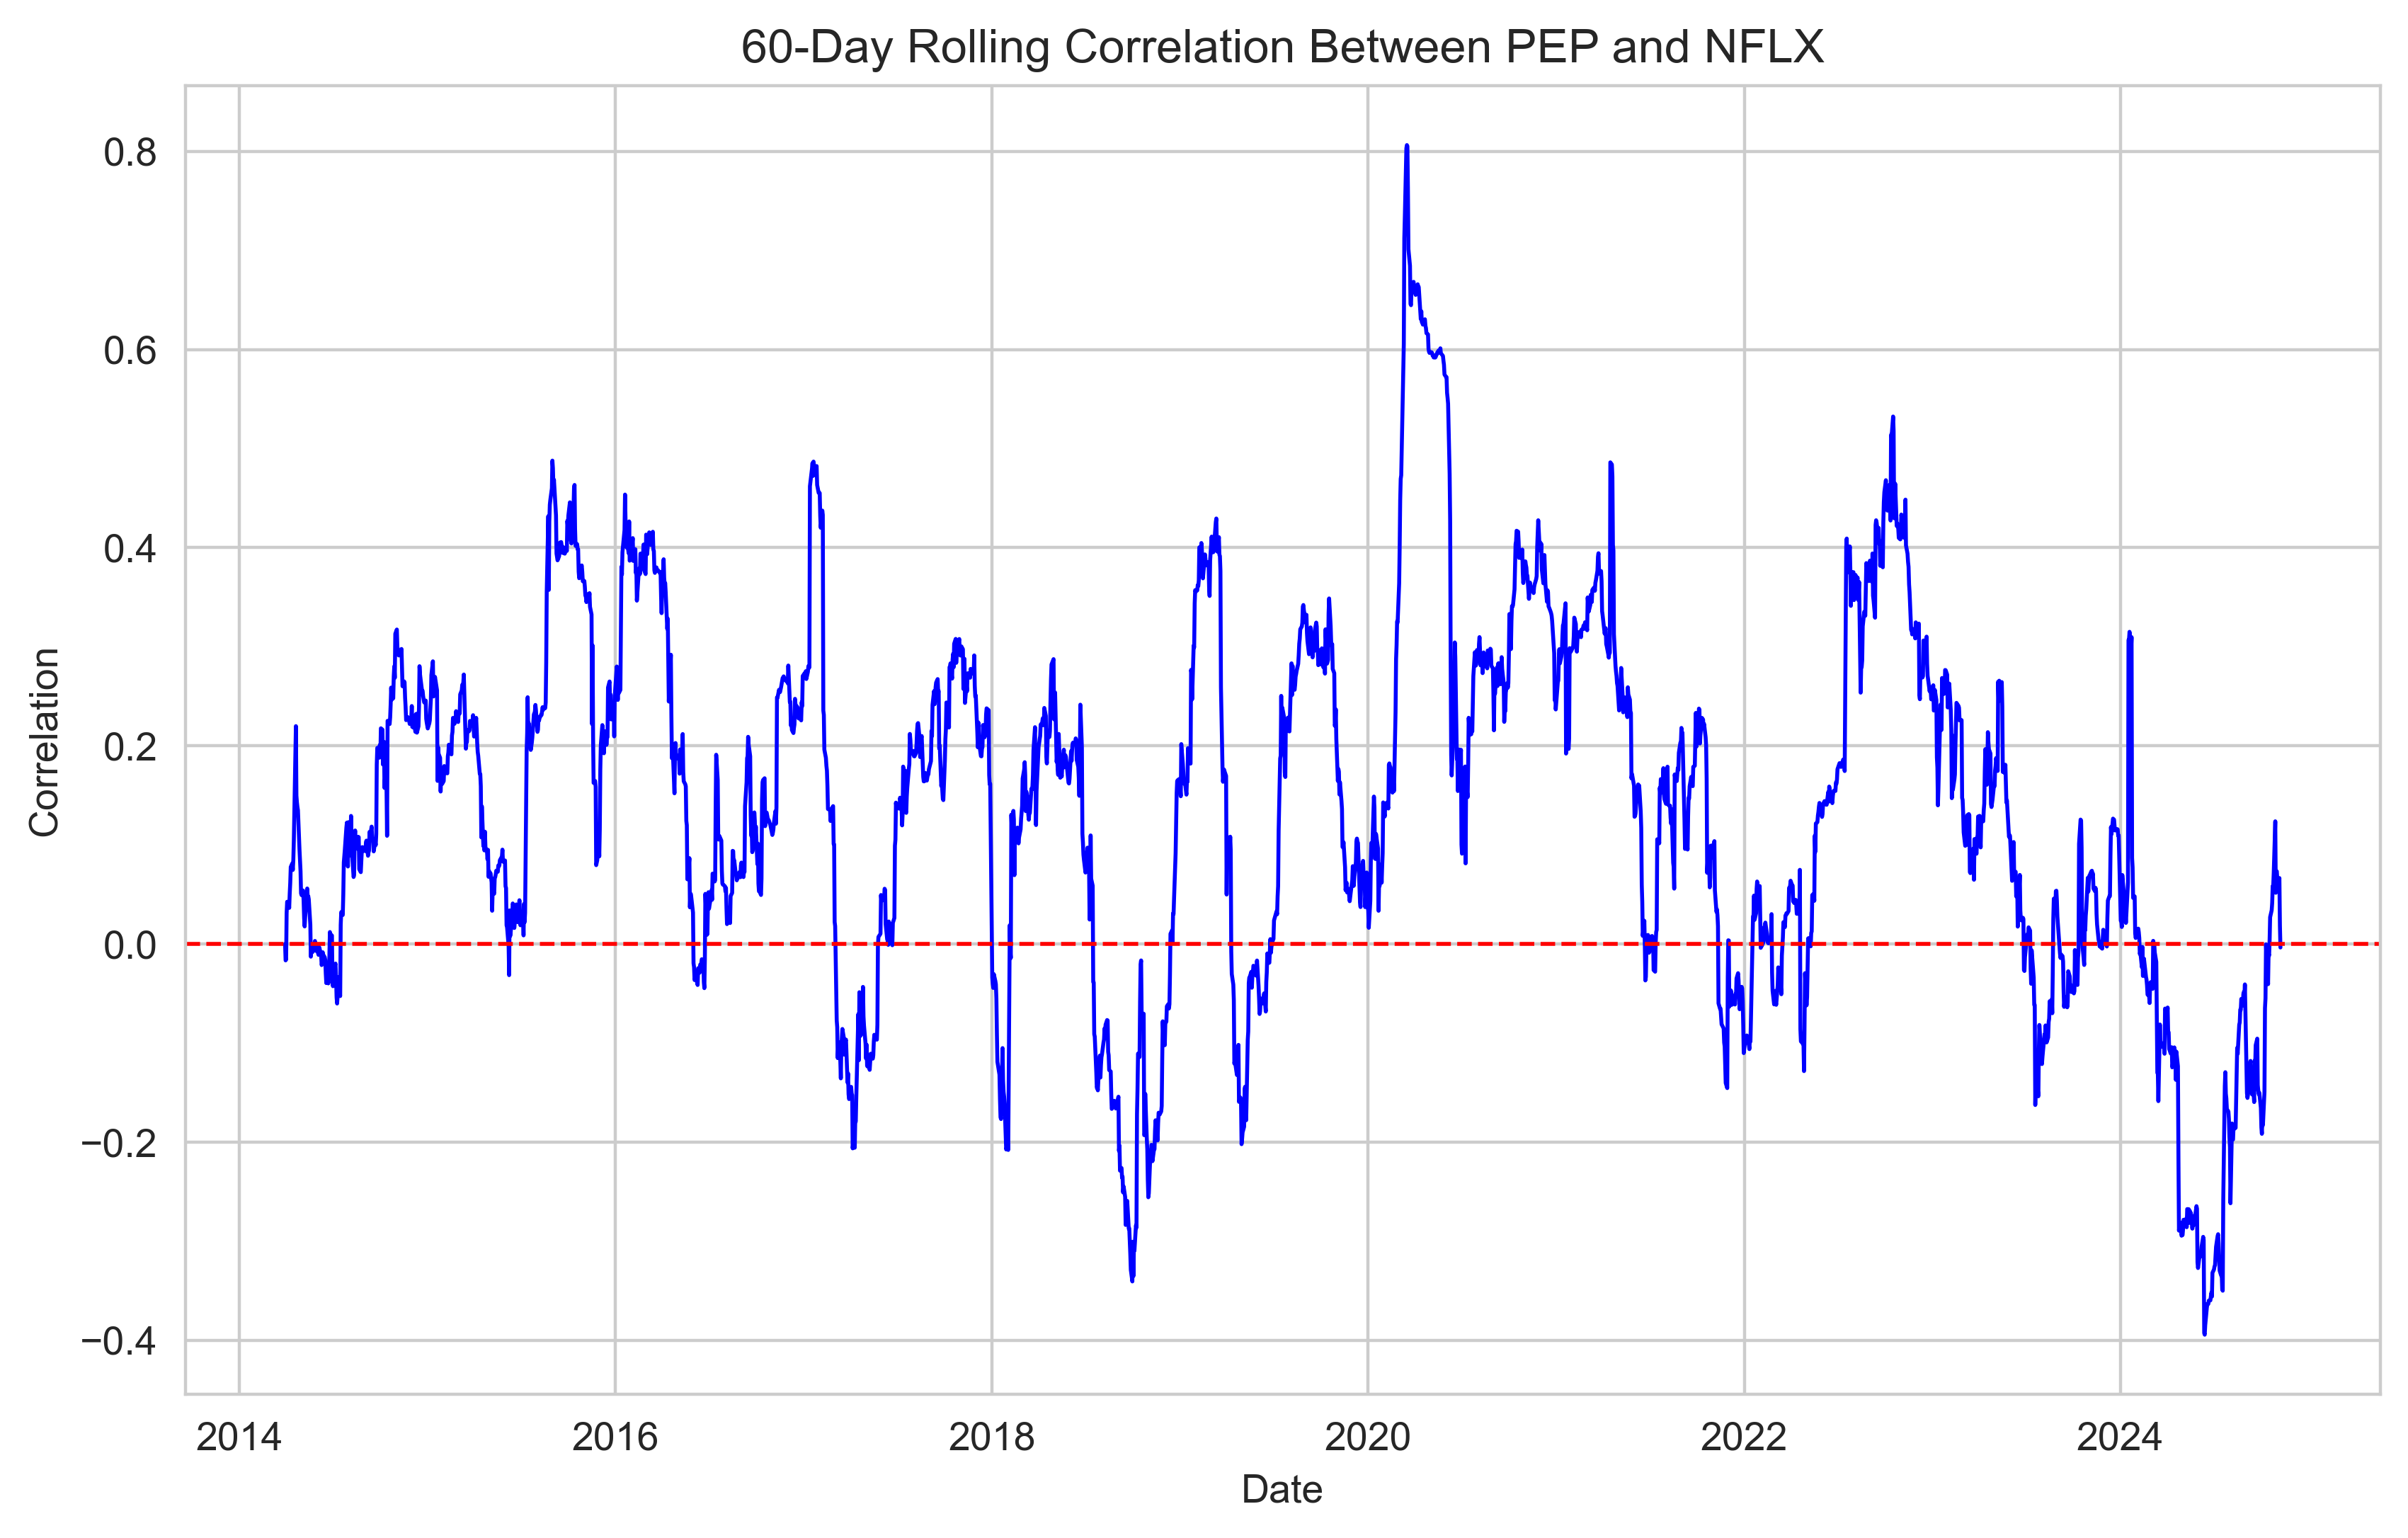

In [584]:
rolling_corr = PEP_data['daily_ret'].rolling(window=60).corr(NFLX_data['daily_ret'])

plt.figure(figsize=(10, 6), dpi = 400)

plt.plot(rolling_corr, color="blue", linewidth = 1)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("60-Day Rolling Correlation Between PEP and NFLX")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()

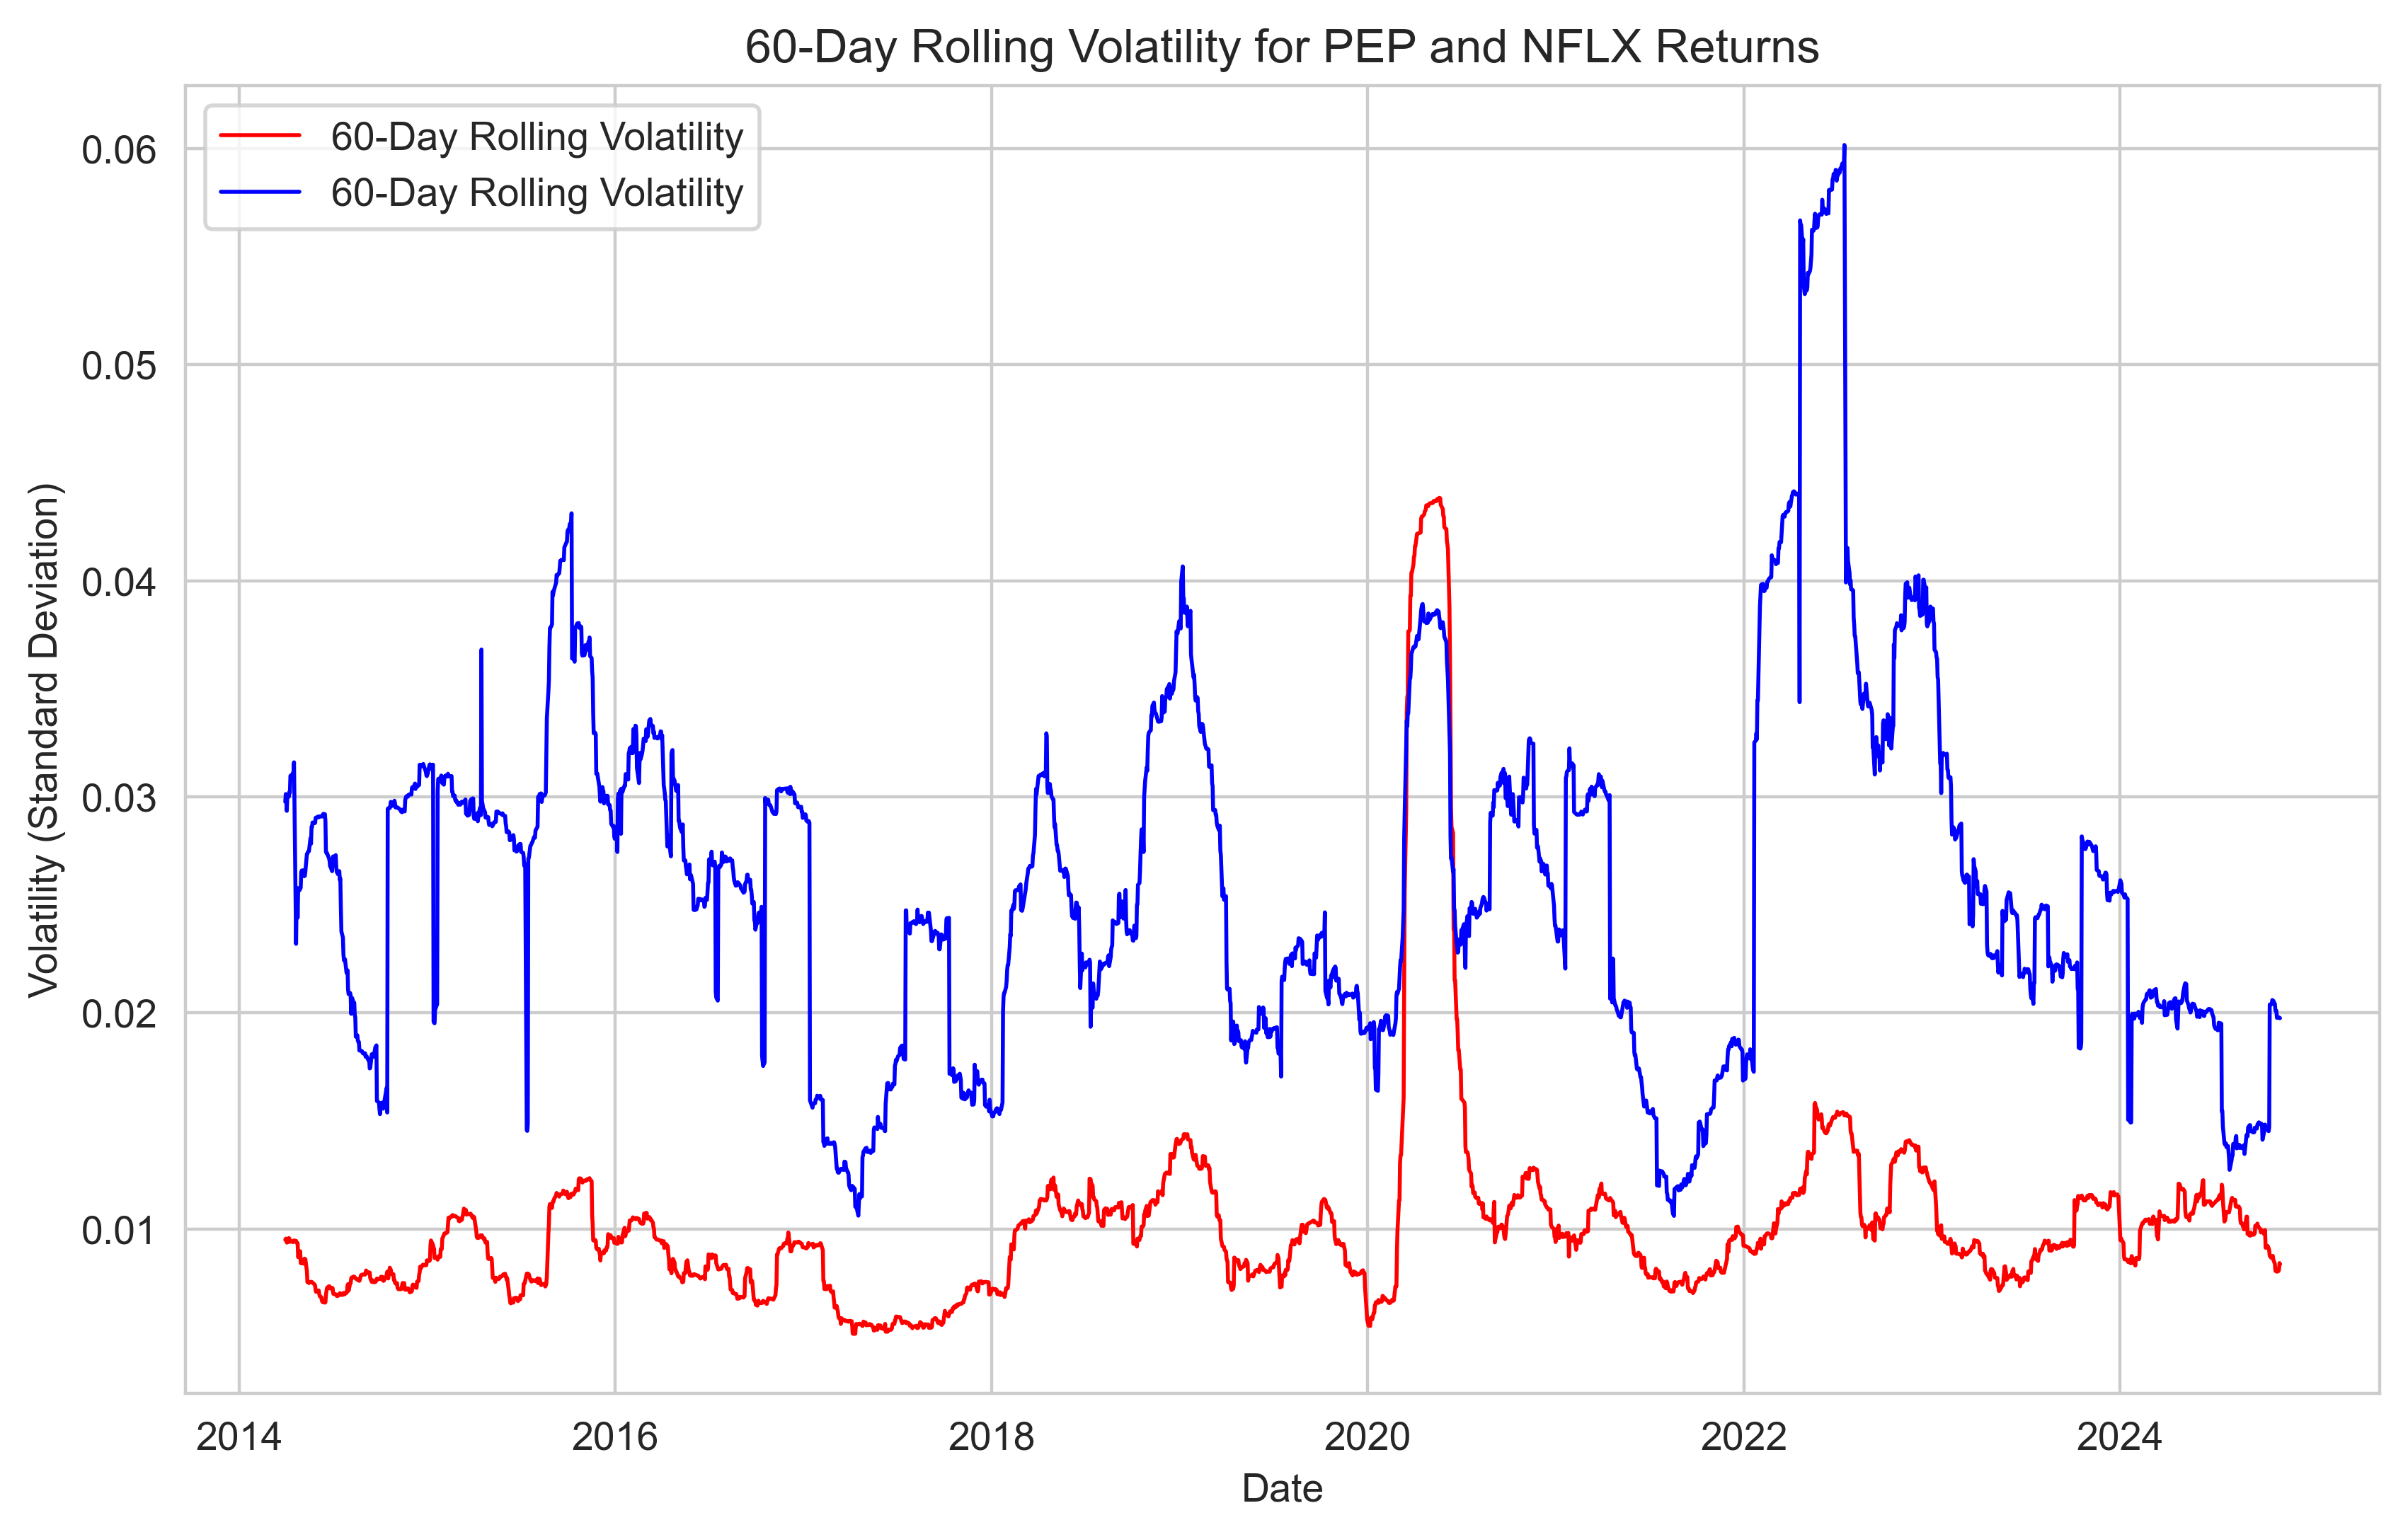

In [570]:
PEP_vol = PEP_data['daily_ret'].rolling(window=60).std()
NFLX_vol = NFLX_data['daily_ret'].rolling(window=60).std()


plt.figure(figsize=(10, 6), dpi = 400)
plt.plot(PEP_vol, label="60-Day Rolling Volatility", color="red", linewidth = 1)
plt.plot(NFLX_vol, label="60-Day Rolling Volatility", color="blue", linewidth = 1)

plt.title("60-Day Rolling Volatility for PEP and NFLX Returns")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.legend()
plt.show()

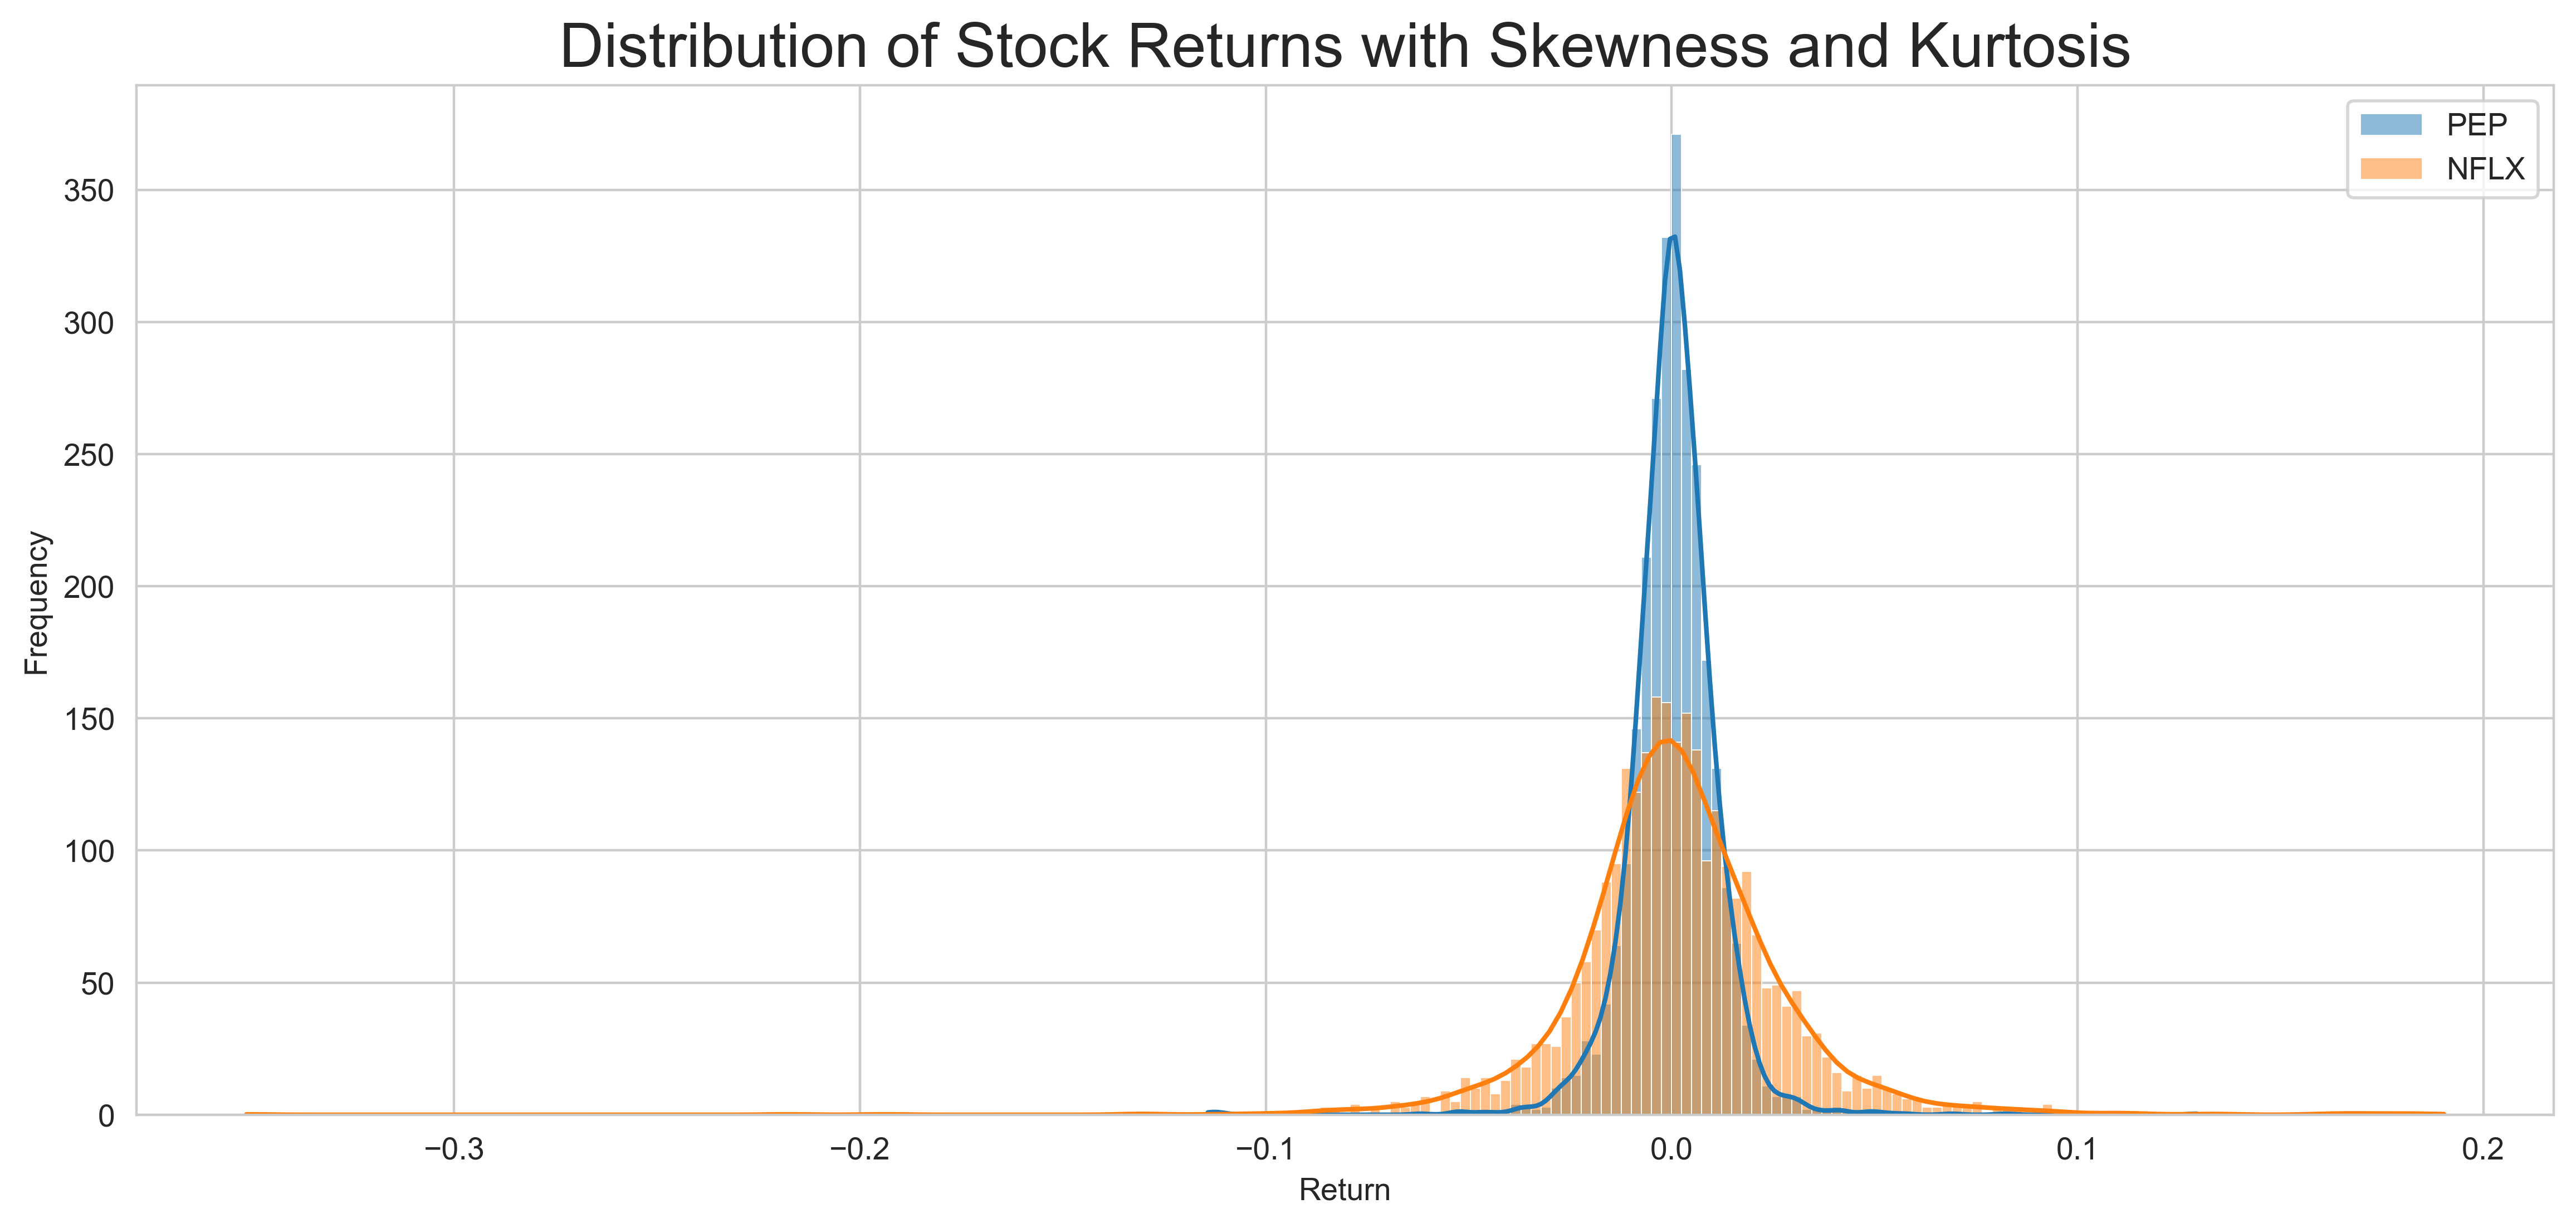

In [592]:
plt.figure(figsize=(14, 6), dpi = 400)
sns.set_style("whitegrid")

min_value = min(PEP_data['daily_ret'].min(), NFLX_data['daily_ret'].min())
max_value = max(PEP_data['daily_ret'].max(), NFLX_data['daily_ret'].max())
bins = np.linspace(min_value, max_value, 220)

sns.histplot(PEP_data['daily_ret'], kde=True, label='PEP', bins=bins, alpha=0.5)
sns.histplot(NFLX_data['daily_ret'], kde=True, label='NFLX', bins=bins, alpha=0.5)


plt.title("Distribution of Stock Returns with Skewness and Kurtosis", fontsize = 20)
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [599]:
from scipy import stats

PEP_data = PEP_data.dropna()
jb_stat, p_value = stats.jarque_bera(PEP_data['daily_ret'])

print(f"JB test statistic: {jb_stat}")
print(f"P-value: {p_value}")

NFLX_data = NFLX_data.dropna()
jb_stat, p_value = stats.jarque_bera(NFLX_data['daily_ret'])

print(f"JB test statistic: {jb_stat}")
print(f"P-value: {p_value}")

JB test statistic: 52046.67255878904
P-value: 0.0
JB test statistic: 34140.0169950591
P-value: 0.0


In [600]:
PEP_data.to_csv('PEP_stock_data.csv', index=False)
NFLX_data.to_csv('NFLX_stock_data.csv', index=False)